# ***Help code Titanic***

# Feature Engineering task

Import needed libraries and packages 

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [219]:
sns.set(style="white", context="notebook", palette="deep")

Train and Test data

In [220]:
path_data = "/home/tsanga/Bureau/CONSERVE/conserve2/rech_perso/data_s/cours_en_ligne/kaggle/z_Train_competitions/t1/"

train = pd.read_csv(path_data+"train_t.csv")

test = pd.read_csv(path_data+"test_t.csv")

For the ease of data pre processing and feature engineering, Join Train and Test data

In [221]:
len(train.columns)
len(test.columns)
train
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [222]:
df_all =  pd.concat([train, test], axis=0).reset_index(drop=True)

In [223]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# **Exploratory Analysis**
**Analyse Training Data**

In [224]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Columns and short description**

1. **PassengerId**: An unique index for passenger rows.
2. **Survived**: 1 stands for survived and 0 stands for not survived (target variable)
3. **Pclass**: Ticket classes:
    * First class
    * Second class
    * Third class
4. **Name**: Passenger's name. Name contains title like "Mr"/Mrs and surname.
5. **Sex**: Passenger's sex. It's either Male or Female.
6. **Age**: Passenger's age.
7. **SibSp**: Number of siblings or spouses travelling with each passenger.
8. **Parch**: Number of parents or children travelling with each passenger.
9. **Ticket**: Ticket number.
10. **Fare**: Ticket price.
11. **Cabin**: Cabin number of the passenger.
12. **Embarked**: Port name where passenger was boarded. C = Cherbourg Q = Queenstown S = Southampton

**Shape of train data**

In [225]:
train.shape

(891, 12)

In [226]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#View missing values matrix

#wait for installation
#import missingno as msno
#msno.matrix(train)

**Check for null value**

In [227]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Categorical features**
1. Survived
2. Sex
3. Embarked

**Ordinal**
1. Pclass

**Continous**
1. Fare

**Discrete**
1. SibSp
2. Parc
3. Age

In [228]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Check correlation of the data**

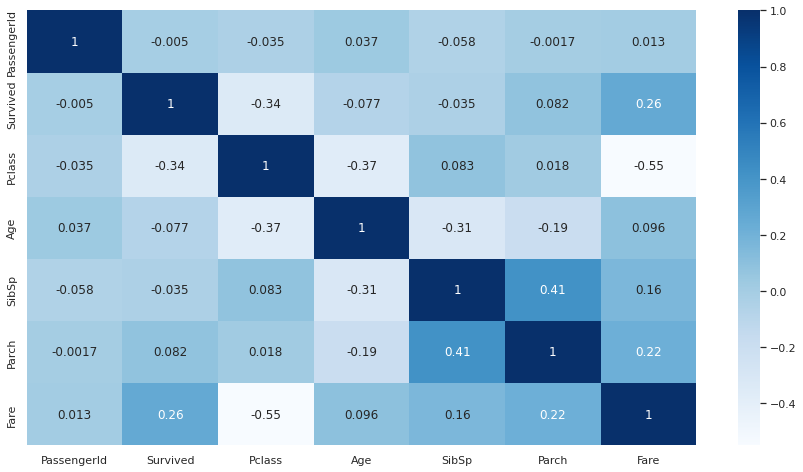

In [229]:
plt.figure(figsize=(15,8))
cor=train.corr()
sns.heatmap(cor,annot=True,cmap="Blues")
plt.show()

# Data Cleaning

Filling missing values

# Fare
Fill missing values of Far column with mean of that column

In [232]:
df_all.Fare.fillna(test.Fare.mean(), inplace=True)

# Embark 

count Embark values

In [233]:
df_all.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

# 
Fill missing values in Embarked column with most frequent value ("S")

In [234]:
df_all.Embarked.fillna('S', inplace=True)
df_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

# Age

In [235]:
df_all_correlation = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_correlation.rename(columns={"level_0": "col-1", "level_1": "col-2", 0: 'Coefficient'}, inplace=True)
df_all_correlation[df_all_correlation['col-1'] == 'Age']

,col-1,col-2,Coefficient
5,Age,Age,1.000000
9,Age,Pclass,0.408106
18,Age,SibSp,0.243699
22,Age,Fare,0.178314
25,Age,Parch,0.150917
30,Age,Survived,0.077221
42,Age,PassengerId,0.028814


**From above correlation table, we can see that, Age and Pclass have hgh correlation.So, we can get the median age of the Pclass to missing age.**

In [236]:
df_all.groupby(['Sex', 'Pclass'])['Age'].median()


Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [237]:
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


### **Ticket & PassengerId**

**Ticket and PassengerId do not provide any usefull importnat for the prediction**

In [238]:
df_all.drop(["Ticket","PassengerId"],axis=1,inplace=True)

### **Cabin**

* Cabin has 1014 missing values which is more than 70%
* Need to drop 'Cabin'

In [239]:
df_all

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,8.0500,NaN,S


In [240]:
df_all.drop("Cabin",axis=1,inplace=True)

## **Feature Engineering**

### **Age**

**Create a new attribute as "Age Group" according to below logic**

In [241]:
def age_group(age):
    a = ''
    if (age<=1):
        a = 'infant'
    elif (age<=4):
        a = 'toddler'
    elif (age<=14):
        a = 'child'
    elif (age<=19):
        a='teenager'
    elif (age <= 25):
        a = 'young_adult'
    elif (age <= 65):
        a = 'middle_age'
    else :
        a = 'old'
    
    return a

df_all['age_group'] = df_all.Age.map(age_group)
df_all

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,young_adult
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,middle_age
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,middle_age
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,middle_age
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,middle_age
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,8.0500,S,young_adult
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,middle_age
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,middle_age
1307,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,8.0500,S,young_adult


### **Family Size**

**Create a new feature named as "Family_Size" by calculating sum of no.of siblings and no.of parents**


In [242]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_group,Family_Size
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,young_adult,2
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,middle_age,2
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,middle_age,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,middle_age,2
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,middle_age,1


**Creating a new feature named as "family_group" according to the no.of members in the family.**

In [243]:
def familyGroup(size):
    a = ''
    if(size<=1):
        a='alone'
    elif (size<=4):
        a='small'
    else:
        a='large'
    return a

df_all['family_group'] = df_all.Family_Size.map(familyGroup)
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### **Names**

**Split the titles from the names**

In [244]:
df_all=df_all.copy()
df_all['Title'] = df_all.Name.str.extract(' ([A-Za-z]+)\.')

pd.crosstab(df_all['Title'], df_all['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


**Replace less common features with 'Title_Other'**

In [245]:
df_all['Title'] = df_all['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Title_Other')
df_all['Title'] = df_all['Title'].replace('Mlle', 'Miss')
df_all['Title'] = df_all['Title'].replace('Ms', 'Miss')
df_all['Title'] = df_all['Title'].replace('Mme', 'Mrs')

In [246]:
df_all.drop(['Name'], axis=1,inplace=True)
pd.crosstab(df_all['Title'], df_all['Sex'])

Sex,female,male
Title,,
Master,0,61
Miss,264,0
Mr,0,757
Mrs,198,0
Title_Other,4,25


### **Pclass**

/home/tsanga/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/tsanga/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/tsanga/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


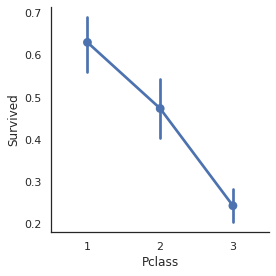

In [247]:
sns.factorplot('Pclass','Survived',order=[1,2,3], data=df_all,size=4)

Above graph show that class 3 has low survival rate

In [248]:
df_all=df_all.copy()

**Introduce new dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers**

In [249]:
pclass_dummies  = pd.get_dummies(df_all['Pclass'])
pclass_dummies.columns = ['Class_1','Class_2','Class_3']
pclass_dummies.drop(['Class_3'], axis=1, inplace=True)

df_all.drop(['Pclass'],axis=1,inplace=True)

df_all = df_all.join(pclass_dummies)
df_all

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,age_group,Family_Size,family_group,Title,Class_1,Class_2
0,0.0,male,22.0,1,0,7.2500,S,young_adult,2,small,Mr,0,0
1,1.0,female,38.0,1,0,71.2833,C,middle_age,2,small,Mrs,1,0
2,1.0,female,26.0,0,0,7.9250,S,middle_age,1,alone,Miss,0,0
3,1.0,female,35.0,1,0,53.1000,S,middle_age,2,small,Mrs,1,0
4,0.0,male,35.0,0,0,8.0500,S,middle_age,1,alone,Mr,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,male,25.0,0,0,8.0500,S,young_adult,1,alone,Mr,0,0
1305,NaN,female,39.0,0,0,108.9000,C,middle_age,1,alone,Title_Other,1,0
1306,NaN,male,38.5,0,0,7.2500,S,middle_age,1,alone,Mr,0,0
1307,NaN,male,25.0,0,0,8.0500,S,young_adult,1,alone,Mr,0,0


### **Embarked**

/home/tsanga/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/tsanga/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/tsanga/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


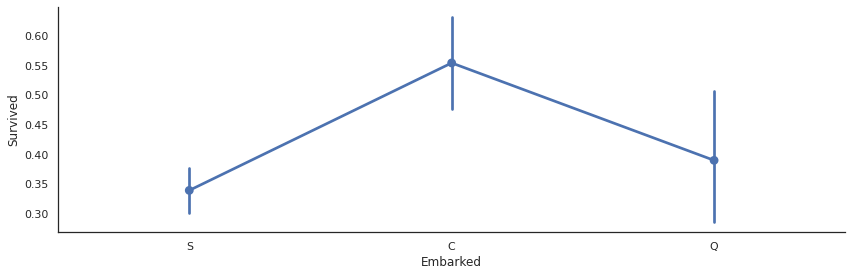

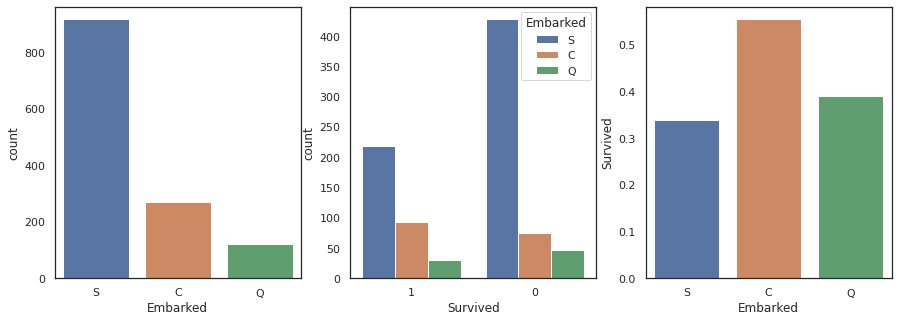

In [250]:
df_all=df_all.copy()

sns.factorplot('Embarked','Survived', data=df_all,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=df_all, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=df_all, order=[1,0], ax=axis2)


embark_perc = df_all[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)



embark_dummies_titanic  = pd.get_dummies(df_all['Embarked'])

**S column can be droped since it contributes to low survival percentage**

In [252]:
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

df_all = df_all.join(embark_dummies_titanic)
df_all.drop(['Embarked'], axis=1,inplace=True)

### **Fare** 

**Create Bins for Fare**

In [253]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)
df_all

,Survived,Sex,Age,SibSp,Parch,Fare,age_group,Family_Size,family_group,Title,Class_1,Class_2,C,Q
0,0.0,male,22.0,1,0,"(-0.001, 7.25]",young_adult,2,small,Mr,0,0,0,0
1,1.0,female,38.0,1,0,"(56.496, 83.475]",middle_age,2,small,Mrs,1,0,1,0
2,1.0,female,26.0,0,0,"(7.896, 8.05]",middle_age,1,alone,Miss,0,0,0,0
3,1.0,female,35.0,1,0,"(34.375, 56.496]",middle_age,2,small,Mrs,1,0,0,0
4,0.0,male,35.0,0,0,"(7.896, 8.05]",middle_age,1,alone,Mr,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,male,25.0,0,0,"(7.896, 8.05]",young_adult,1,alone,Mr,0,0,0,0
1305,NaN,female,39.0,0,0,"(83.475, 512.329]",middle_age,1,alone,Title_Other,1,0,1,0
1306,NaN,male,38.5,0,0,"(-0.001, 7.25]",middle_age,1,alone,Mr,0,0,0,0
1307,NaN,male,25.0,0,0,"(7.896, 8.05]",young_adult,1,alone,Mr,0,0,0,0


In [254]:
df_all.isnull().sum()

Survived        418
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
age_group         0
Family_Size       0
family_group      0
Title             0
Class_1           0
Class_2           0
C                 0
Q                 0
dtype: int64

## **Encoding** 

In [255]:
non_numeric_features_list = ['Sex', 'Fare', 'age_group', 'Title', 'family_group']
for feature in non_numeric_features_list:
    df_all[feature] = LabelEncoder().fit_transform(df_all[feature])
df_all

,Survived,Sex,Age,SibSp,Parch,Fare,age_group,Family_Size,family_group,Title,Class_1,Class_2,C,Q
0,0.0,1,22.0,1,0,0,6,2,2,2,0,0,0,0
1,1.0,0,38.0,1,0,11,2,2,2,3,1,0,1,0
2,1.0,0,26.0,0,0,3,2,1,0,1,0,0,0,0
3,1.0,0,35.0,1,0,10,2,2,2,3,1,0,0,0
4,0.0,1,35.0,0,0,3,2,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,1,25.0,0,0,3,6,1,0,2,0,0,0,0
1305,NaN,0,39.0,0,0,12,2,1,0,4,1,0,1,0
1306,NaN,1,38.5,0,0,0,2,1,0,2,0,0,0,0
1307,NaN,1,25.0,0,0,3,6,1,0,2,0,0,0,0


## **RandomForest Model**

In [256]:
# define training and testing sets
train_X=df_all.copy()[:len(train)]
train_Y=train_X.pop("Survived")
test_X  = df_all.copy()[len(train):]
test_X.pop("Survived")

891    NaN
892    NaN
893    NaN
894    NaN
895    NaN
        ..
1304   NaN
1305   NaN
1306   NaN
1307   NaN
1308   NaN
Name: Survived, Length: 418, dtype: float64

### **Scaling with StandardScalar**

In [257]:
train_X = StandardScaler().fit_transform(train_X)
test_X = StandardScaler().fit_transform(test_X)

In [258]:
clf = RandomForestClassifier(n_estimators=100)

## **Model Prediction**

In [259]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(train_X, train_Y)

pred_Y = clf.predict(test_X)

print(clf.score(train_X, train_Y))

clf.score(train_X, train_Y)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred_Y.astype(int)
    })
submission.to_csv('submission_help1.csv', index=False)

0.9618406285072951
